# Homework Assignment 2

## Section 1: Admissions Dataset

In [2]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [4]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [5]:
admissions.prestige.value_counts(normalize=True, ascending = False) 

2.0    0.375940
3.0    0.303258
4.0    0.167920
1.0    0.152882
Name: prestige, dtype: float64

In [6]:
admissions.shape

(400, 4)

In [7]:
admissions.gpa.value_counts(normalize=True, ascending = False) 

4.00    0.070352
3.31    0.020101
3.40    0.017588
3.45    0.017588
3.15    0.017588
3.35    0.017588
2.98    0.015075
3.63    0.015075
3.22    0.012563
3.38    0.012563
3.59    0.012563
3.34    0.012563
3.58    0.012563
3.43    0.012563
3.46    0.012563
3.51    0.012563
3.95    0.012563
3.17    0.012563
3.94    0.012563
2.93    0.012563
3.77    0.012563
3.19    0.012563
3.13    0.012563
3.33    0.012563
3.64    0.012563
3.78    0.010050
3.36    0.010050
3.30    0.010050
3.14    0.010050
3.07    0.010050
          ...   
3.82    0.002513
3.87    0.002513
2.88    0.002513
3.09    0.002513
3.72    0.002513
3.41    0.002513
2.63    0.002513
2.52    0.002513
3.83    0.002513
2.76    0.002513
2.83    0.002513
3.10    0.002513
2.65    0.002513
2.84    0.002513
2.87    0.002513
3.93    0.002513
3.03    0.002513
2.69    0.002513
3.91    0.002513
3.66    0.002513
2.73    0.002513
2.26    0.002513
3.55    0.002513
3.98    0.002513
2.55    0.002513
3.06    0.002513
3.21    0.002513
3.97    0.0025

In [8]:
#  "admit" is Target Variable
# features = (gre, gpa and prestige )
#  Prestige is categorical
# gre and gpa are continuous

In [9]:
#  Null Hypothesis

admissions.admit.value_counts(normalize=True, ascending = False) 

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [14]:
#Creating a dummy variable in dataset

admit_dumy = pd.get_dummies(admissions.prestige, prefix = "prestige", drop_first= True)

In [15]:
admissions.drop("prestige",axis =1,inplace = True)

In [16]:
#Concatenating the admissions and prestige dataframes

admsn_df = pd.concat([admissions,admit_dumy],axis = 1)
#3. View new concatenated dataframe
admsn_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [17]:
# To predict whether a student will get an admission or not using his/her gpa, gre and prestige 

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

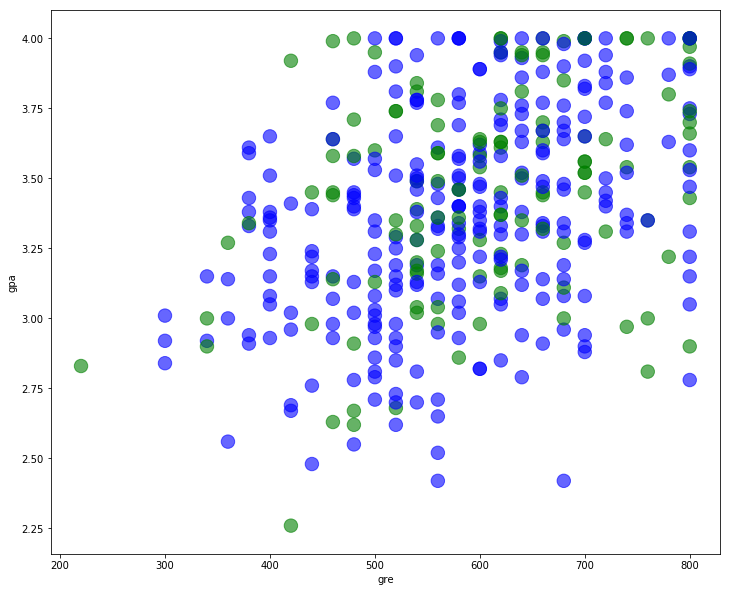

In [19]:
#assign Blue to class 0 and Green to class 1. For plotting purposes.
colors = pd.Series(admsn_df["admit"]).map({0:"blue", 1:"green"})
plt.figure(figsize=(12,10))
#df = pd.DataFrame(data[0], columns=["feature_one", "feature_two"])
#df["target"] = data[1]
plt.scatter(admsn_df.gre, admsn_df.gpa, c=colors, s=180, alpha = .6)
plt.xlabel("gre",)
plt.ylabel("gpa");

In [20]:
# very smaller % of students get admission
# There is no clear corelation between gre, gpa values and admit. 

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.cross_validation import train_test_split, cross_val_score


/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
admsn_df.dropna(inplace=True)

In [23]:
#Create X and y variables
X = admsn_df.drop("admit", axis=1)
y = admsn_df.admit

In [24]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=25)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 70.00 percent of the testing data


In [25]:
# Average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X,y, cv=5, scoring="accuracy").mean()

print (("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100))

The cross validated accuracy score is 70.28 percent


In [26]:
lr.score(X_test,y_test)

0.69999999999999996

In [27]:
lr.score(X_train,y_train)

0.69696969696969702

In [28]:
X_train.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
301,660.0,3.60,0,1,0
352,580.0,3.12,0,1,0
360,520.0,4.00,0,0,0
178,620.0,3.33,0,1,0
121,480.0,2.67,1,0,0


In [29]:
test_prob = lr.predict_proba(X_train)[:,1]
test_prob

array([ 0.26663367,  0.2311683 ,  0.43421285,  0.24774262,  0.30296085,
        0.29216894,  0.25892103,  0.45772641,  0.23701836,  0.29649417,
        0.22001244,  0.45875597,  0.30042889,  0.23634235,  0.35320371,
        0.4437962 ,  0.2218196 ,  0.38835628,  0.37318304,  0.22117565,
        0.15971285,  0.24640606,  0.36412673,  0.37756122,  0.38452166,
        0.2919432 ,  0.26637692,  0.39797197,  0.22034272,  0.4640292 ,
        0.30334181,  0.41119108,  0.46076422,  0.41373741,  0.2135458 ,
        0.31823359,  0.27102242,  0.43426367,  0.31510728,  0.48935489,
        0.17159239,  0.29212962,  0.39403576,  0.50132849,  0.20553151,
        0.4000098 ,  0.32318754,  0.35620999,  0.25040338,  0.20635699,
        0.35720864,  0.35767011,  0.28699455,  0.29321722,  0.20718369,
        0.39420191,  0.20851633,  0.49842477,  0.4057963 ,  0.36387033,
        0.42283605,  0.26843531,  0.22098621,  0.30709533,  0.28377854,
        0.23417861,  0.53594959,  0.39461397,  0.36722104,  0.27

In [30]:
# Good Model 
# Test Score close to  Training Score

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification


/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
#KNN Model Intialize parameter grid

#Range of neighbors to test
neighbor_range = list(range(1, 51, 2))

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbor_range

param_grid_knn

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49]}

In [35]:
#Intialize Grid

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_knn.fit(X, y)

grid_knn.grid_scores_

[mean: 0.63476, std: 0.05644, params: {'n_neighbors': 1},
 mean: 0.64484, std: 0.06267, params: {'n_neighbors': 3},
 mean: 0.64987, std: 0.03396, params: {'n_neighbors': 5},
 mean: 0.66499, std: 0.03594, params: {'n_neighbors': 7},
 mean: 0.67254, std: 0.05082, params: {'n_neighbors': 9},
 mean: 0.65743, std: 0.04826, params: {'n_neighbors': 11},
 mean: 0.66751, std: 0.04540, params: {'n_neighbors': 13},
 mean: 0.67254, std: 0.06035, params: {'n_neighbors': 15},
 mean: 0.67003, std: 0.04187, params: {'n_neighbors': 17},
 mean: 0.67506, std: 0.03113, params: {'n_neighbors': 19},
 mean: 0.68010, std: 0.03005, params: {'n_neighbors': 21},
 mean: 0.67758, std: 0.03321, params: {'n_neighbors': 23},
 mean: 0.67758, std: 0.02282, params: {'n_neighbors': 25},
 mean: 0.68262, std: 0.02748, params: {'n_neighbors': 27},
 mean: 0.68262, std: 0.02802, params: {'n_neighbors': 29},
 mean: 0.68262, std: 0.02802, params: {'n_neighbors': 31},
 mean: 0.67506, std: 0.01969, params: {'n_neighbors': 33},
 m

In [36]:
grid_knn.best_score_

0.6826196473551638

In [37]:
grid_knn.best_params_

{'n_neighbors': 27}

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


#Range of neighbors to test
depths_range = list(range(2, 20))

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [41]:
#Intialize Model

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Model Fit

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [42]:
grid_dt.best_score_

0.6649874055415617

In [43]:
grid_dt.best_params_

{'max_depth': 2}

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

In [44]:
# For addimission use case, we need to more focus on Righ and deserving student, so I will go with reducing False negatives,

# "False positive", is less worry as we have given addmission to under performing student


**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [45]:
# Coefficient 
lr.coef_[0]

array([ 0.0015864 ,  0.13134233, -0.33041355, -0.91664584, -0.94444103])

In [46]:
#coefficients with values
coef = pd.DataFrame(columns=["coef", "value"])
coef["coef"] = X.columns
coef["value"] = np.transpose(lr.coef_[0])

coef

,coef,value
0,gre,0.001586
1,gpa,0.131342
2,prestige_2.0,-0.330414
3,prestige_3.0,-0.916646
4,prestige_4.0,-0.944441


In [48]:
test_data = pd.DataFrame({'gre':[560,750,660,500],
                           'gpa':[3.6,3.8,3.1,3.4],
                           'prestige':[2.0,4.0,1.0,3.0]
                          })
test_data

,gpa,gre,prestige
0,3.6,560,2.0
1,3.8,750,4.0
2,3.1,660,1.0
3,3.4,500,3.0


In [49]:
test_dumy = pd.get_dummies(test_data.prestige, prefix = "prestige")

In [50]:
test_dumy.drop("prestige_1.0",axis=1,inplace=True)

In [51]:
test_data.drop("prestige",axis =1,inplace = True)

In [52]:
test_data2 = pd.concat([test_data,test_dumy],axis = 1)

test_data2.head()

,gpa,gre,prestige_2.0,prestige_3.0,prestige_4.0
0,3.6,560,1,0,0
1,3.8,750,0,0,1
2,3.1,660,0,0,0
3,3.4,500,0,1,0


In [54]:
lr.predict(test_data2)

array([1, 1, 1, 1])

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [55]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [57]:
data.describe()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.267225,0.913052,-0.021879,-0.007041,0.488571,0.000533,0.214764,0.473963,0.276314,-0.001805,0.719916,0.016530,0.301720,-0.686948,0.361750
std,1.937676,3.021233,1.000251,1.010572,1.709379,1.699261,1.899664,1.760681,1.797701,0.982354,1.800790,0.991669,1.821065,3.675909,0.480567
min,-6.937360,-12.397333,-4.303971,-3.754228,-6.185402,-6.502010,-8.197095,-5.768151,-5.999394,-3.689324,-6.220787,-3.169294,-5.589536,-13.042620,0.000000
25%,-1.559472,-1.004986,-0.693617,-0.663096,-0.631218,-1.125261,-0.965050,-0.747362,-0.907813,-0.674620,-0.506630,-0.650516,-0.921863,-3.161465,0.000000
50%,-0.272602,1.030225,0.001604,-0.018837,0.538179,0.047370,0.299145,0.495901,0.300742,0.004425,0.717371,0.013667,0.263889,-0.721604,0.000000
75%,0.947680,2.990420,0.645886,0.673647,1.594229,1.132822,1.461197,1.666650,1.480998,0.651688,1.946477,0.661317,1.512332,1.515665,1.000000
max,6.680262,12.031816,3.424344,4.113957,7.032764,6.458744,7.532350,6.954996,6.621243,3.880595,7.368307,3.135799,7.445434,13.432946,1.000000


In [58]:
data.target.value_counts(normalize=True, ascending = False) 

0    0.63825
1    0.36175
Name: target, dtype: float64

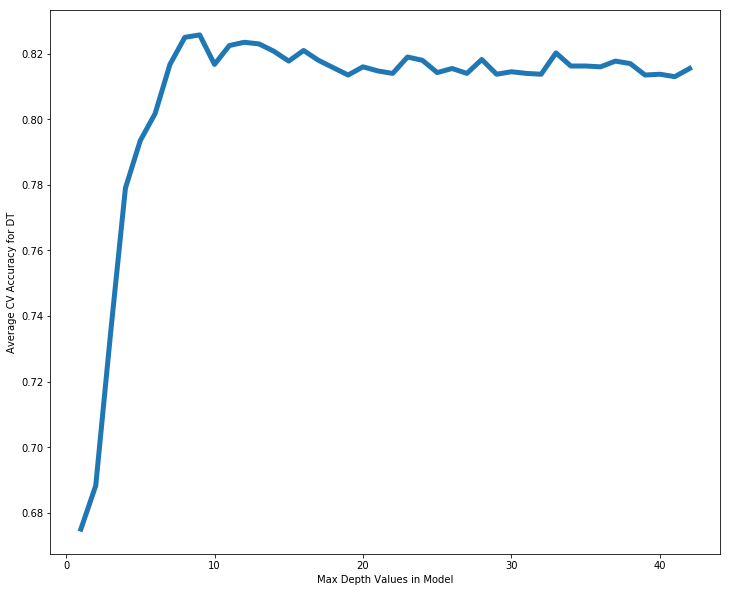

In [63]:
# DT 

#Create X and y variables
dt_X = data.drop("target", axis=1)
dt_y = data.target

plt.figure(figsize=(12,10))

depths = range(1, 43)

cv_scores = []
for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth=i), dt_X, dt_y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 5)

plt.xlabel("Max Depth Values in Model")
plt.ylabel("Average CV Accuracy for DT");

In [64]:
#Range of neighbors to test
depths_range = list(range(2, 43))

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt



{'max_depth': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42]}

In [65]:
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(dt_X, dt_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [66]:
grid_dt.best_score_

0.826

In [67]:
grid_dt.best_params_

{'max_depth': 9}

In [69]:

# DT Model 
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(dt_X, dt_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
#Call feature importanes and put that in a dataframe

df = pd.DataFrame(columns = ["score","feature"])
df["score"] = dt.feature_importances_
df["feature"] = dt_X.columns
df

,score,feature
0,0.037654,haight
1,0.052032,mission
2,0.020166,soma
3,0.017403,sunset
4,0.125350,richmond
5,0.156311,glen_park
6,0.096748,castro
7,0.083176,potrero
8,0.099567,hayes_valley
9,0.005937,fillmore


In [72]:
columns = ["marina","bernal","fillmore","sunset","soma","haight"]

dt_X2 = dt_X.drop(columns, axis=1)

In [73]:
#Initialize 

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid 

grid_dt.fit(dt_X2, dt_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
grid_dt.best_score_

0.81775

In [75]:
grid_dt.best_params_

{'max_depth': 9}

In [76]:
## LR Model

#Step 1
dX_train, dX_test, dy_train, dy_test = train_test_split(dt_X, dt_y, 
                                                    test_size=0.4,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(dX_train, dy_train)

#Step 3
preds = lr.predict(dX_test)

#Step 4
testing_score = accuracy_score(dy_test, preds)

print ("The model classifies {:.2f} % of the Test Dataset".format(testing_score*100))

The model classifies 75.06 % of the Test Dataset


In [78]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), dt_X,dt_y, cv=5, scoring="accuracy").mean()

print (("The CV Accuracy score is {:.2f} %").format(mean_cv_score*100))

The CV Accuracy score is 76.65 %


In [79]:
#Table of coefficients and their values
d_coef = pd.DataFrame(columns=["coef", "value"])
d_coef["coef"] = dt_X.columns
d_coef["value"] = np.transpose(lr.coef_[0])

d_coef

,coef,value
0,haight,-0.231724
1,mission,0.165422
2,soma,0.014287
3,sunset,-0.036342
4,richmond,-0.397628
5,glen_park,0.185643
6,castro,0.275169
7,potrero,-0.388687
8,hayes_valley,0.011970
9,fillmore,0.011140


In [81]:
## RF Model 

from sklearn.ensemble import RandomForestRegressor

# list of values to try for n_estimators
estimator_range = range(10, 420, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, dt_X, dt_y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

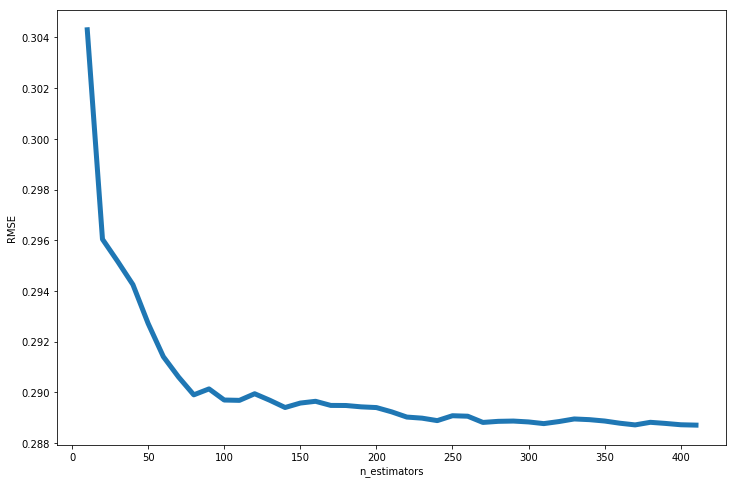

In [83]:
plt.figure(figsize=(12, 8))
plt.plot(estimator_range, RMSE_scores, linewidth = 5)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [84]:
#Best estimator
sorted(zip(RMSE_scores, estimator_range))[0]

(0.28871137959333409, 410)

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [85]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [86]:
movies.shape

(5043, 28)

In [87]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [88]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [89]:
movies.dropna(subset = ["gross"], inplace=True)

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 5042
Data columns (total 28 columns):
color                        4157 non-null object
director_name                4156 non-null object
num_critic_for_reviews       4156 non-null float64
duration                     4157 non-null float64
director_facebook_likes      4156 non-null float64
actor_3_facebook_likes       4146 non-null float64
actor_2_name                 4153 non-null object
actor_1_facebook_likes       4155 non-null float64
gross                        4159 non-null float64
genres                       4159 non-null object
actor_1_name                 4155 non-null object
movie_title                  4159 non-null object
num_voted_users              4159 non-null int64
cast_total_facebook_likes    4159 non-null int64
actor_3_name                 4146 non-null object
facenumber_in_poster         4152 non-null float64
plot_keywords                4119 non-null object
movie_imdb_link              4159 non-

In [91]:
movies.color.value_counts(normalize=True)

Color               0.966562
 Black and White    0.033438
Name: color, dtype: float64

In [93]:
# Create dummy dataset

color_dums = pd.get_dummies(movies.color, prefix = "col", drop_first= True)
content_rating_dums = pd.get_dummies(movies.content_rating, prefix = "cont_rtng", drop_first= True)


In [94]:

# Drop from the training dataset 

m_cols = ["director_name","actor_2_name","movie_title","actor_3_name","genres","actor_1_name","plot_keywords","movie_imdb_link","language","country"]

movies.drop(m_cols,axis =1,inplace = True)

In [95]:
m2_cols = ["color","content_rating"]

movies.drop(m2_cols,axis =1,inplace = True)
mov_df = pd.concat([movies,color_dums,content_rating_dums],axis = 1)
mov_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,cont_rtng_M,cont_rtng_NC-17,cont_rtng_Not Rated,cont_rtng_PG,cont_rtng_PG-13,cont_rtng_Passed,cont_rtng_R,cont_rtng_TV-MA,cont_rtng_Unrated,cont_rtng_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,1,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,1,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,1,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,1,0,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0,0,0,0,1,0,0,0,0,0


In [96]:
mov_df.shape

(4159, 29)

In [97]:
mov_df2 = mov_df.dropna()

In [98]:
mov_df2.shape

(3801, 29)

In [99]:
mov_df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,cont_rtng_M,cont_rtng_NC-17,cont_rtng_Not Rated,cont_rtng_PG,cont_rtng_PG-13,cont_rtng_Passed,cont_rtng_R,cont_rtng_TV-MA,cont_rtng_Unrated,cont_rtng_X
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03,3.801000e+03,3801.000000,3801.000000,3801.000000,...,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0,3801.000000,3801.000000
mean,165.848724,110.207840,798.599053,763.819521,7673.008419,5.200576e+07,1.046772e+05,11414.850303,1.379111,333.571692,...,0.000526,0.001579,0.008945,0.149171,0.345435,0.000789,0.449619,0.0,0.006051,0.002631
std,123.564807,22.688693,3051.030222,1884.372443,15448.143479,7.012065e+07,1.515070e+05,19045.793637,2.052899,410.048394,...,0.022936,0.039705,0.094167,0.356304,0.475573,0.028086,0.497521,0.0,0.077563,0.051231
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,75.000000,96.000000,11.000000,187.000000,736.000000,7.689458e+06,1.891500e+04,1865.000000,0.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,137.000000,106.000000,62.000000,433.000000,1000.000000,2.920000e+07,5.302800e+04,3969.000000,1.000000,208.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,223.000000,120.000000,234.000000,690.000000,13000.000000,6.646637e+07,1.269160e+05,16143.000000,2.000000,397.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

## Assign X & Y

mov_X = mov_df2.drop("gross", axis = 1)
mov_y = mov_df2.gross

# Intialize Linear Regression model
lr = LinearRegression()

# Model Fit
lr.fit(mov_X, mov_y)
# Print out the R^2 for the model against the full dataset
lr.score(mov_X,mov_y)

0.55097019057794361

In [101]:
lr2 = lr.fit(mov_X, mov_y)

In [102]:
lr2.intercept_

882471221.70034754

In [103]:
lr2.coef_

array([  1.14415020e+05,   1.58382240e+05,  -1.24989707e+03,
        -1.10019953e+04,  -9.56645244e+03,   2.05517874e+02,
         9.52551361e+03,  -6.24239537e+05,   1.56104497e+04,
         9.01663318e-03,  -4.47817314e+05,  -8.93137604e+03,
        -3.86914239e+06,  -1.68909893e+06,  -1.57536115e+02,
         1.88101947e+07,   4.65613139e+07,  -6.43730894e+05,
         9.09940160e+06,  -2.11169789e+07,  -1.08178148e+07,
         4.01037875e+07,   1.65689322e+07,  -3.05897721e+07,
        -1.09062570e+07,   1.39698386e-09,  -4.73998224e+06,
        -1.58335674e+07])

In [104]:
linreg = LinearRegression()
mov_scores = cross_val_score(linreg, mov_X, mov_y, cv=5, scoring='mean_squared_error')
np.sqrt(abs(mov_scores)).mean()

/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/shikishor/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

51245925.690606833

In [105]:
cross_val_score(LinearRegression(), mov_X, mov_y, cv = 5, scoring="r2").mean()

0.04995830432133741

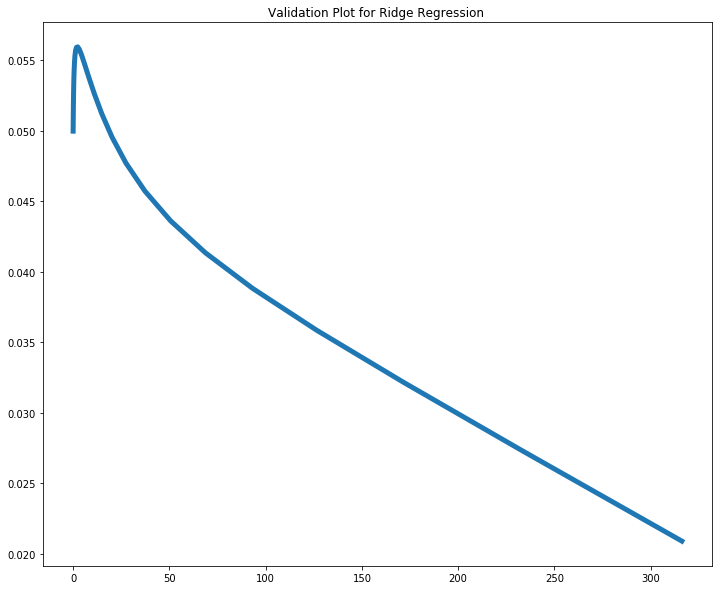

In [106]:
#Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Alpha values for ridge model
ridge_alphas = np.logspace(-4, 2.5, 50)


ridge_cv_scores = []

for i in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha=i), mov_X, mov_y, cv = 5).mean()
    ridge_cv_scores.append(cv_score)

plt.figure(figsize=(12, 10))
plt.title("Validation Plot for Ridge Regression ")
plt.plot(ridge_alphas, ridge_cv_scores, linewidth = 5);

In [107]:
#Alpha values for lasso model
lasso_alphas = np.logspace(-4, 0, 50)

In [109]:
lasso_cv_scores = []

for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), mov_X, mov_y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)



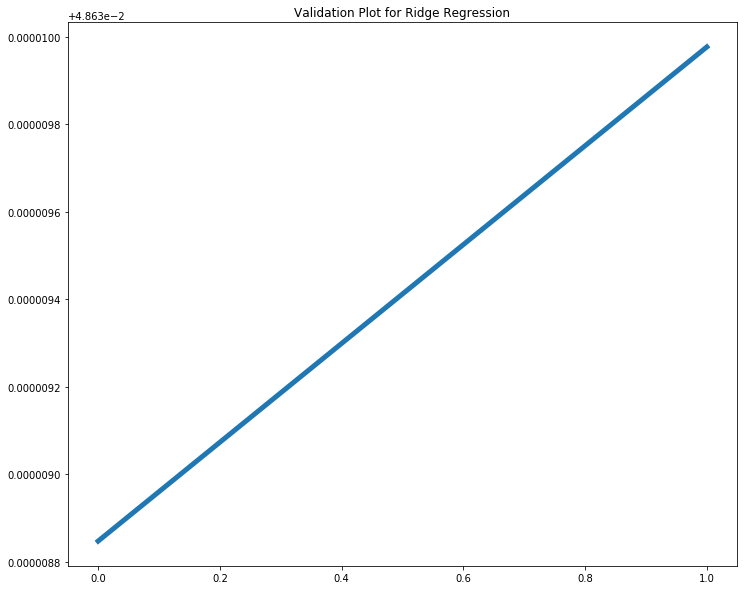

In [110]:
plt.figure(figsize=(12, 10))
plt.title("Validation Plot for Ridge Regression")
plt.plot(lasso_alphas, lasso_cv_scores, linewidth = 5);

In [ ]:
# Ridge Regression 
from sklearn.linear_model import Ridge

pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                            ('ridgeregression', Ridge())]) 

param_grid_ridge = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8],
              'ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = RandomizedSearchCV(pipe_poly, param_distributions=param_grid_ridge, 
                                n_iter = 12 , cv = 5, scoring='r2')
grid_ridge.fit(XX, y)

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.